1. Importando todas las bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

**2. Carga de datos**

Cargue el conjunto de datos de breast_cancer desde sklearn.datasets. Está claro que el conjunto de datos tiene 569 elementos de datos con 30 atributos de entrada. Hay dos clases de resultados: benignos y malignos. Debido a las 30 funciones de entrada, es imposible visualizar estos datos.

In [47]:
data = load_breast_cancer()
print('Las llaves son: ', data.keys())
print('\nnombre de los objetivos: ', data['target_names'])
print('\nnombre de los atributos: ', data['feature_names'])

Las llaves son:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

nombre de los objetivos:  ['malignant' 'benign']

nombre de los atributos:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**3. Aplicar PCA**

* Estandarice el conjunto de datos antes de PCA
* Importe PCA de sklearn.descomposition
* Elija el número de componentes principales

Seleccionamos 3. Después de ejecutar este código, sabemos que las dimensiones de x son (569,3) mientras que la dimensión de los datos reales es (569,30). Así, está claro que con PCA, el número de dimensiones se ha reducido a 3 de 30. Si elegimos n_components = 2, las dimensiones se reducirían a 2.

In [50]:
#Se crea el dataframe usando pandas
df1 = pd.DataFrame(data['data'], columns=data['feature_names'])
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [57]:
#Escalando los datos antes de aplicar PCA
scaling = StandardScaler()

#Usando el método fit y transform
scaling.fit(df1)
scaled_data = scaling.transform(df1)

#Se ajusta n_components=3
principal =PCA(n_components=3)
principal.fit(scaled_data)
x=principal.transform(scaled_data)

#Verificamos las dimensiones de los datos antes y después de aplicar PCA
print('dimensiones de los datos antes de PCA: ', scaled_data.shape)
print('dimensiones de los datos después de PCA: ', x.shape)

dimensiones de los datos antes de PCA:  (569, 30)
dimensiones de los datos después de PCA:  (569, 3)


**4. Verifique los componentes**

Los componentes principales_ proporcionan una matriz en la que el número de filas indica el número de componentes principales, mientras que el número de columnas es igual al número de características en los datos reales. Podemos ver fácilmente que hay  tres filas ya que se eligió n_components como 3. Sin embargo, cada fila tiene 30 columnas como en los datos reales.

In [61]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853117,  0.0645499 , -0.00931416,  0.02869954, -0.1042913 ,
        -0.07409163,  0.00273358, -0.02556383, -0

**5. Trace los componentes (visualización)**

Trace los componentes principales para una mejor visualización de los datos. Aunque habíamos tomando n_components=3, aquí estamos trazando un gráfico 2d y 3d utilizando los dos primeros componentes principales y los 3 componentes principales respectivamente. Para tres componentes principales, necesitamos trazar un gráfico 3D. Los colores muestran las 2 clases de salida del conjunto de datos original: benigno y maligno. Está claro que los componentes principales muestran una clara separación entre dos clases de productos.

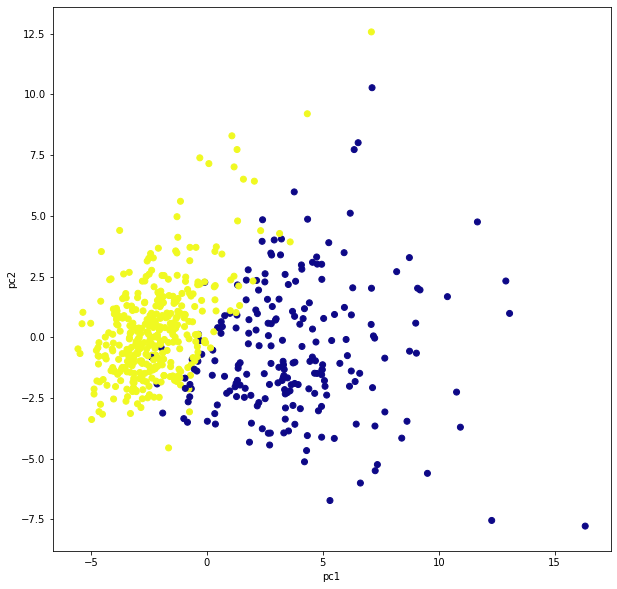

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=data['target'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

Para tres componentes principales, necesitamos trazar un gráfico 3D. $x[:,0]$ significa el primer componente principal. De manera similar, $x[:,1]$ y $x[:,2]$ representa el segundo y tercer componente principal.

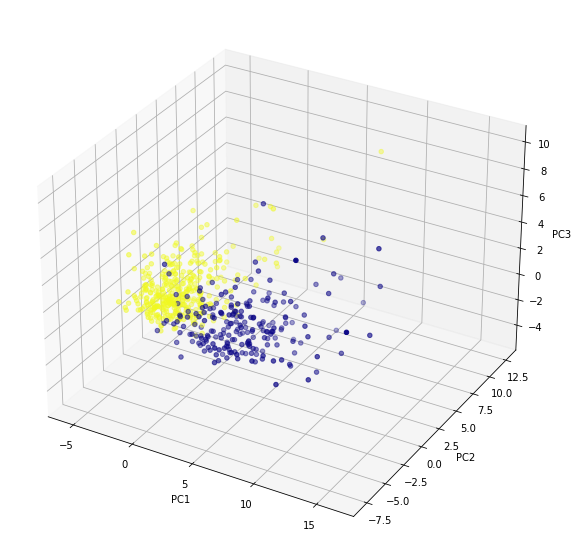

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:,0], x[:,1], x[:,2], c=data['target'], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)
plt.show()

**6. Calcular la relación de varianza**

Explained_variance_ratio proporciona una idea de cuánta variación se explica por los componenten principales

In [79]:
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]
